In [11]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Посмотрю на количество уникальных значений переменны.

In [6]:
for _ in data.columns:
    if len(data[_].unique()) < 10:
        print(_, '=', data[_].unique())
    else: print(_, 'num of values: ',len(data[_].unique()))

CRIM num of values:  504
ZN num of values:  26
INDUS num of values:  76
CHAS = [0 1]
NOX num of values:  81
RM num of values:  446
AGE num of values:  356
DIS num of values:  412
RAD = [ 1  2  3  5  4  8  6  7 24]
TAX num of values:  66
PTRATIO num of values:  46
B num of values:  357
LSTAT num of values:  455
MEDV num of values:  229


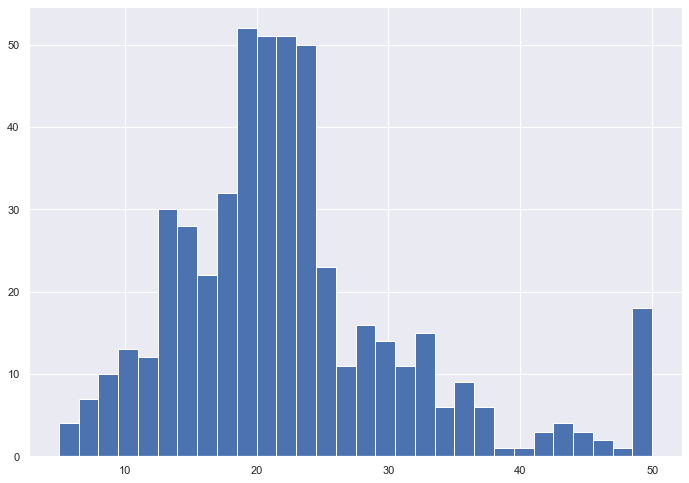

In [8]:
plt.hist(data['MEDV'], bins=30)
plt.show()

In [35]:
data[data['MEDV'] >39].shape

(32, 14)

In [33]:
data[data['MEDV'] >49].shape

(16, 14)

In [39]:
data[data['MEDV'] >49].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0
25%,0.409202,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0


In [40]:
data[data['MEDV'] < 15].sample(16).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.000000,16.0,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,15.218388,0.0,17.806875,0.0625,0.684188,5.869125,94.087500,1.925194,20.312500,612.812500,19.968750,313.811875,20.861875,12.35625
std,18.218706,0.0,2.761417,0.2500,0.074770,0.455148,10.632709,0.667467,7.930689,116.969636,1.438387,148.025056,6.650042,2.59794
min,1.354720,0.0,8.140000,0.0000,0.538000,4.906000,59.700000,1.174200,4.000000,307.000000,14.700000,16.450000,13.040000,5.60000
25%,6.184065,0.0,18.100000,0.0000,0.657000,5.714250,94.625000,1.654800,24.000000,666.000000,20.200000,319.487500,15.697500,10.80000
50%,8.986925,0.0,18.100000,0.0000,0.693000,5.996500,97.700000,1.832750,24.000000,666.000000,20.200000,394.175000,18.750000,13.60000
75%,14.698175,0.0,18.100000,0.0000,0.714250,6.187000,100.000000,2.016200,24.000000,666.000000,20.200000,396.900000,23.275000,14.25000
max,73.534100,0.0,21.890000,1.0000,0.871000,6.405000,100.000000,4.175000,24.000000,666.000000,21.200000,396.900000,34.770000,14.90000


### Видим близкое к нормальному распределение значения-тарегета.

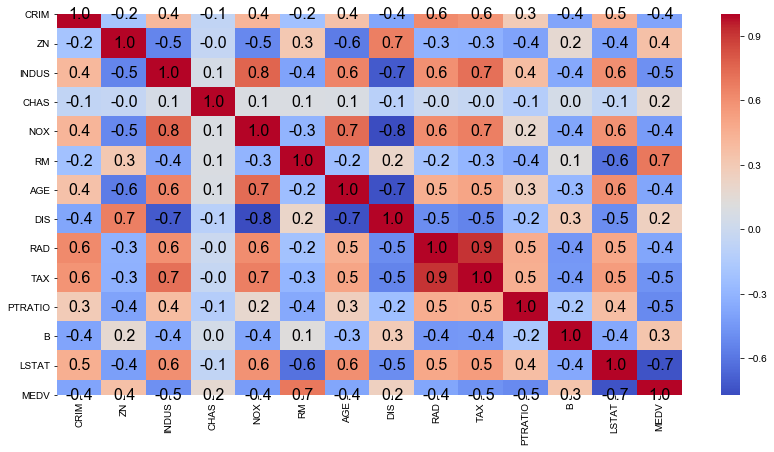

In [6]:
sns.heatmap(data.corr(),           
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            annot_kws={'size':16, 'color':'black'},
            cbar=True)
sns.set(font_scale=1.2)
fig=plt.gcf()
fig.set_size_inches(14,7)
plt.show()

* Показатель `MEDV` коррелирует с `RM` и имеет обратную корреляцию с `LSTAT`.


* `RAD` и `TAX` имеют корреляцию 0.9. `NDUS` и `NOX` имеют корреляцию 0.8.


* Сильная обратная корреляция — `NOX` и `DIS`.


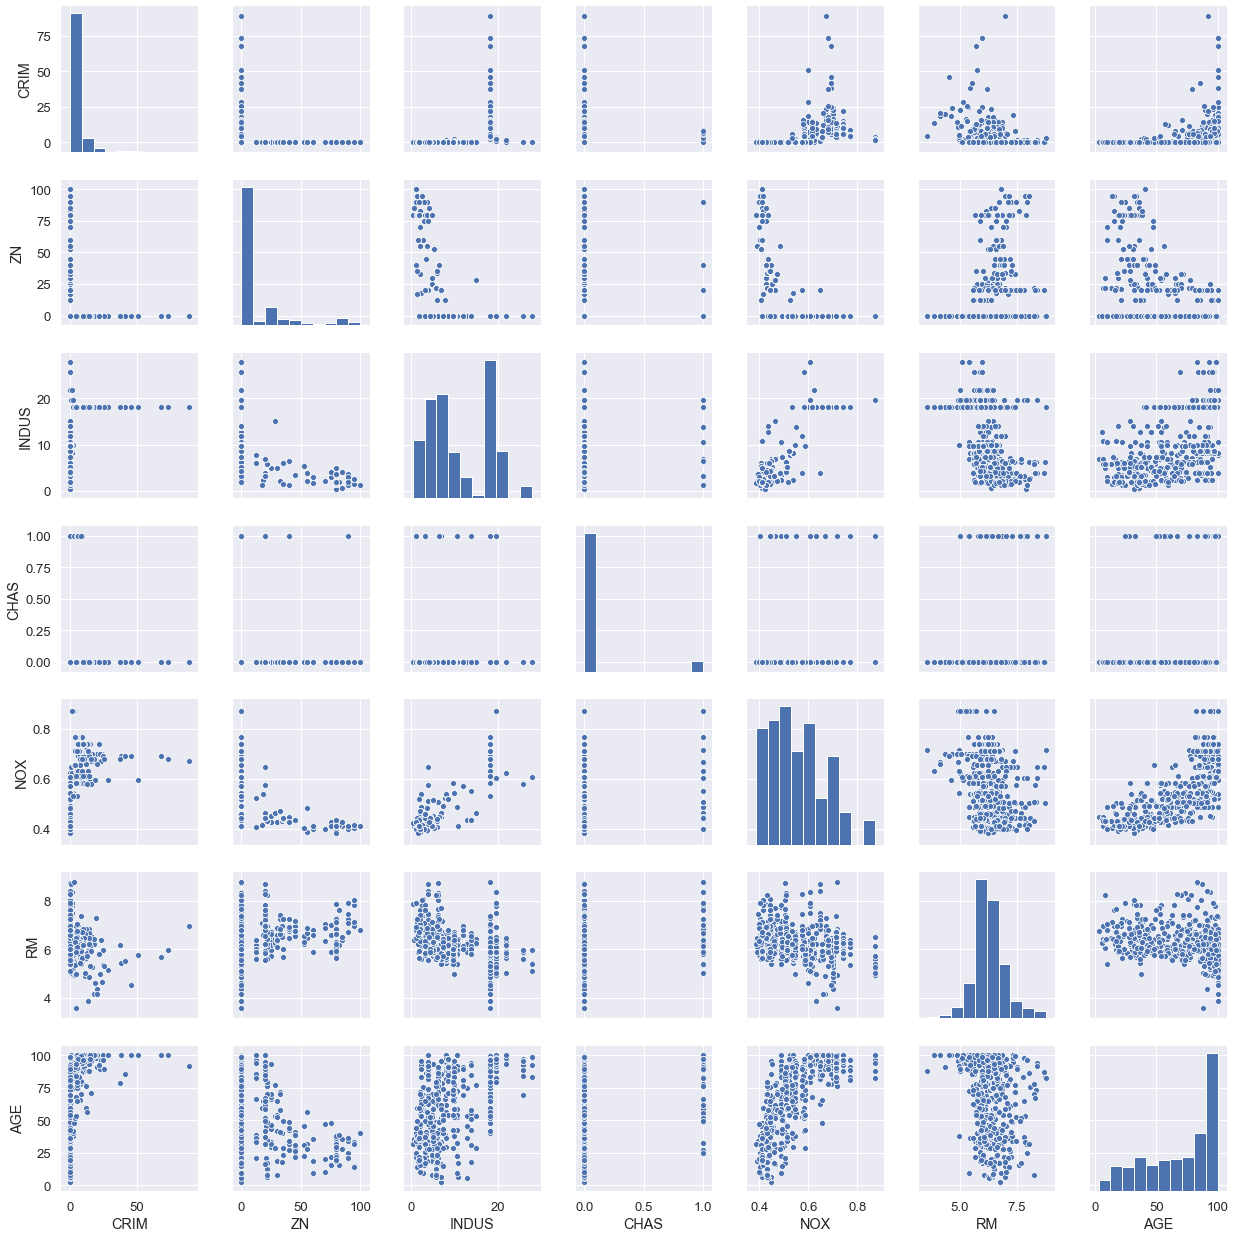

In [53]:
sns.pairplot(data.iloc[:,:7])

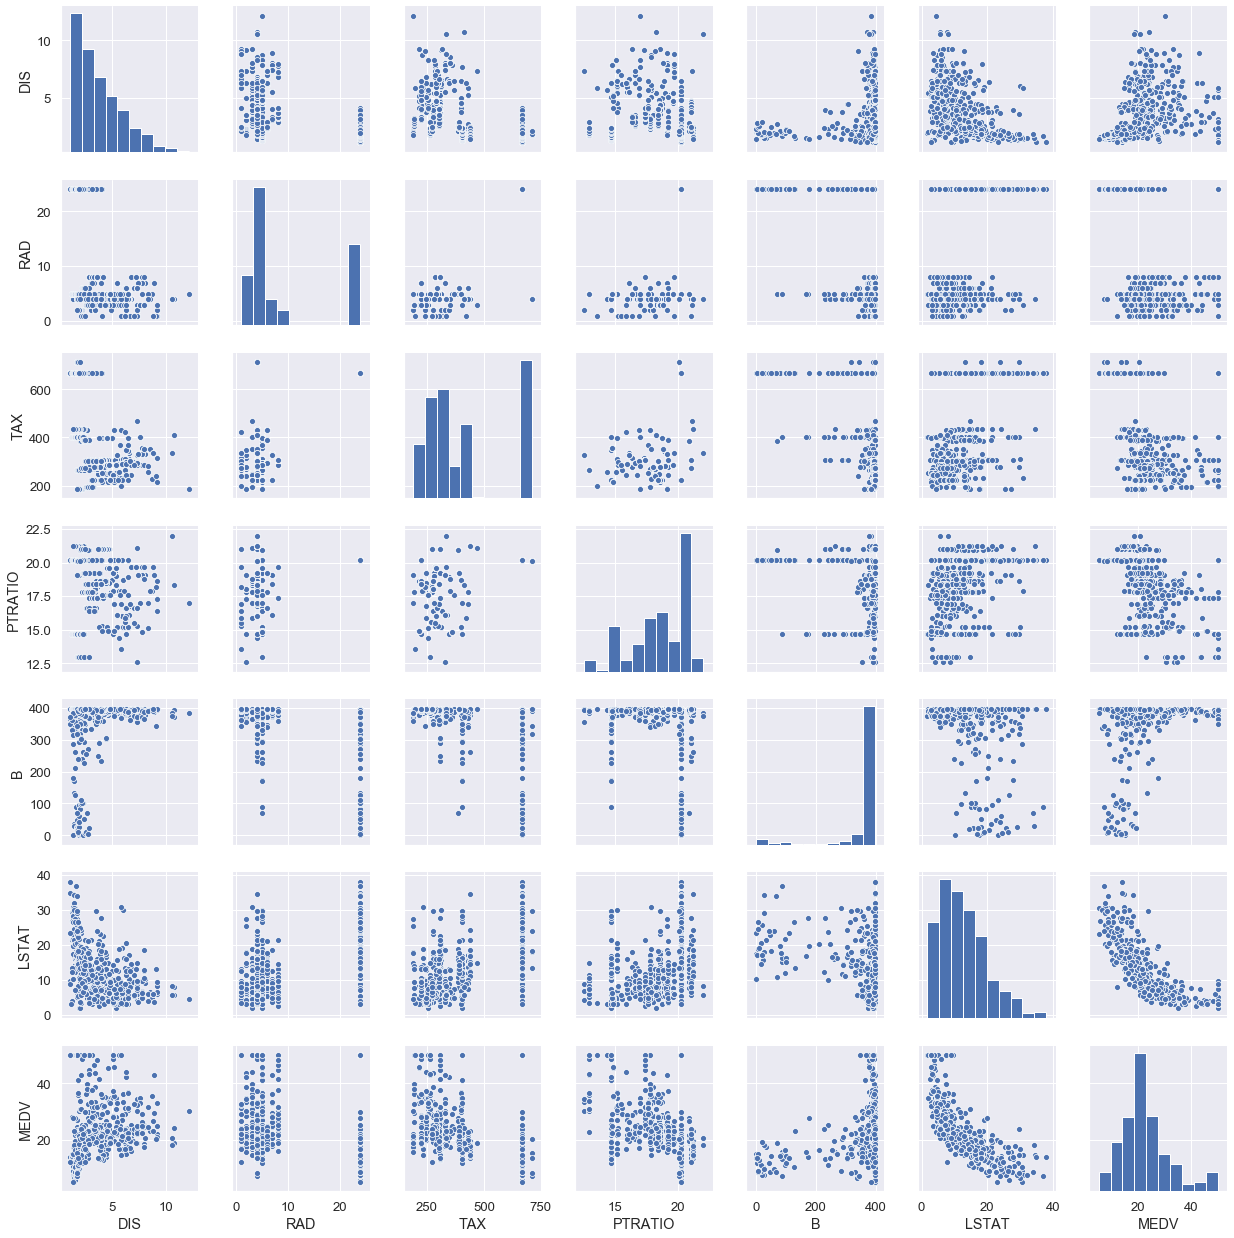

In [55]:
sns.pairplot(data.iloc[:,7:])

In [12]:
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
245,0.19133,22.0,5.86,0,0.431,5.605,70.2,7.9549,7,330,19.1,389.13,18.46,18.5
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384,20.9,387.69,14.09,20.4
375,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5
376,15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,13.9
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9


In [12]:
X_rooms = data.RM
y_price = data.MEDV


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [35]:
len(list(data.columns)[:-1])

13

## Посмотрим на регрессию от одной перемнной, с наибольшей корреляцией:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [18]:
from sklearn.metrics import mean_squared_error

In [29]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Точность на тренировочных данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тренировочных данных
--------------------------------------
RMSE = 6.972277149440586
R2 = 0.43




### тестовые данные

In [45]:

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Точность на тестовых данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тестовых данных
--------------------------------------
RMSE = 4.895963186952216
R2 = 0.69




#### LinearRegression по всем данным

In [41]:
X = data.drop('MEDV', axis = 1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("Точность на тренировочных данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тренировочных данных
--------------------------------------
RMSE = 4.6520331848801675
R2 = 0.75




In [44]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("Точность на тестовых данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тестовых данных
--------------------------------------
RMSE = 4.928602182665367
R2 = 0.67




In [49]:
# params_list = list(data.columns)[:-1]

# X = data[params_list]
# y = data['MEDV']


for n in range(13):
    print(params_list[n],
    '\weights: {}'.format(reg.coef_[n]))

    
    
print('\nBias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

print('\nSCORE:',reg.score(X,y))

CRIM \weights: -0.10801135783679491
ZN \weights: 0.04642045836688241
INDUS \weights: 0.020558626367076806
CHAS \weights: 2.68673381934492
NOX \weights: -17.76661122830006
RM \weights: 3.8098652068092247
AGE \weights: 0.0006922246403416862
DIS \weights: -1.47556684560025
RAD \weights: 0.30604947898516827
TAX \weights: -0.012334593916574212
PTRATIO \weights: -0.9527472317072893
B \weights: 0.009311683273793473
LSTAT \weights: -0.5247583778554898

Bias: 36.459488385090005
Error: 3.270862810900314

SCORE: 0.7406426641094094


In [27]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu